Phan Hong Phuc

# **PORTFOLIO OPTIMIZATION USING MPT IN PYTHON**

---

# Table of Content

1) Introduction

2) Load required libraries

3) Load data

4) Exploratory data analyst

5) Practical implimentation

6) Conclusion

7) References

# Introduction

* A portfolio is a collection of financial instruments like stocks, bonds, commodities, cash and cash equivalents , as well as their fund counterparts. (Investopedia)

* Returns: It refers to the gain or loss on our asset/portfolio over a fixed time frame

* Modern portfolio theory (MPT, for short) is a financial model, for assembling an asset portfolio that optimizes the risk-return tradeoff. 

Let $R$ be a vector of asset returns $R_i$, $w$ be a vector of weights $w_i$, $\sum$ be a covariance matrix of the vector $R$. Then,

$$E(R_p) = R^Tw$$

$$ \sigma_p^2 = w^T * Cov(R_i, R_j) * w * 252$$

Here we will use this theory to find the optimum portfolio under 4 distinct cases:
 
- An Investor wants the portfolio with the lowest level of risk.

- An Investor wants the optimum portfolio giving the optimum combination of risk and returns.

- An Investor wants a portfolio giving a return not less than the minimum acceptable return fixed by the investor.

- A portfolio that maximizes the Investor’s utility.

The goal of this project is to determine the portfolio weights of the securities, or the proportion in which the budget has to be distributed among the securities.

# Load required libraries

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

**Data source**

I used a my own package to collect closing prices of stocks from website, its named [data_reader.py](https://github.com/P-H-Phuc/Data-Analyst-Portfolio/blob/main/instruments/data_reader.py) in folder instrumetns of this repository.

I will have my portfolio containing four assets *(Equities-focused portfolio)*: the shares of FPT, VCB, PLX and MCH.

<img alt="FPT" src="https://finance.vietstock.vn/image/FPT" width="230" height="130"/>
<img alt="VCB" src="https://finance.vietstock.vn/image/VCB" width="230" height="130"/>
<img alt="PLX" src="https://finance.vietstock.vn/image/PLX" width="230" height="130"/>
<img alt="MCH" src="https://finance.vietstock.vn/image/MCH" width="230" height="130"/>

In [2]:
#Import my packages
import function_for_portfolio as ffp
from pathlib import Path
import os; import sys
this_dir = os.path.dirname(Path().resolve())
sys.path.insert(0, f"{this_dir}\\instruments")
import data_reader

In [3]:
#Get data (about 2m to run)
data = data_reader.get_data(['FPT', 'VCB', 'PLX', 'MCH'], start='2019-01-01')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2019-01-02 to 2021-12-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FPT     743 non-null    object
 1   VCB     743 non-null    object
 2   PLX     743 non-null    object
 3   MCH     743 non-null    object
dtypes: object(4)
memory usage: 29.0+ KB


There is a problem here, the closing prices of the assets are not formatted properly, rather as a float rather than an object.

In [5]:
#Convert argument to a numeric type
cols = data.columns.values
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2019-01-02 to 2021-12-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FPT     743 non-null    float64
 1   VCB     743 non-null    float64
 2   PLX     743 non-null    float64
 3   MCH     743 non-null    float64
dtypes: float64(4)
memory usage: 29.0 KB


# Exploratory data analysis

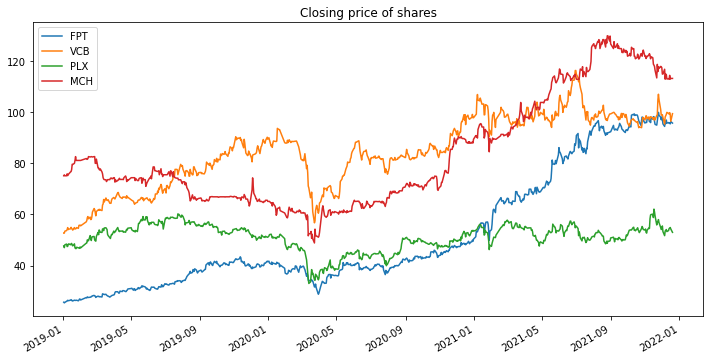

In [6]:
#Visual origin data
data.plot(figsize=(12, 6), title='Closing price of shares')
plt.show()

We can see that in recent days, FPT and MCH stocks have a strong uptrend while VCB and PLX have slowed down.

In [7]:
#Statistics descriptive of shares
data.describe()

,FPT,VCB,PLX,MCH
count,743.000000,743.000000,743.000000,743.000000
mean,51.745357,84.739838,51.019744,83.283607
std,22.850093,13.862349,5.202152,21.605766
min,25.380000,52.700000,32.980000,48.840000
25%,36.440000,75.840000,48.415000,66.335000
50%,41.000000,84.900000,51.900000,74.410000
75%,67.705000,97.200000,54.660000,97.970000
max,100.000000,116.400000,62.100000,130.000000


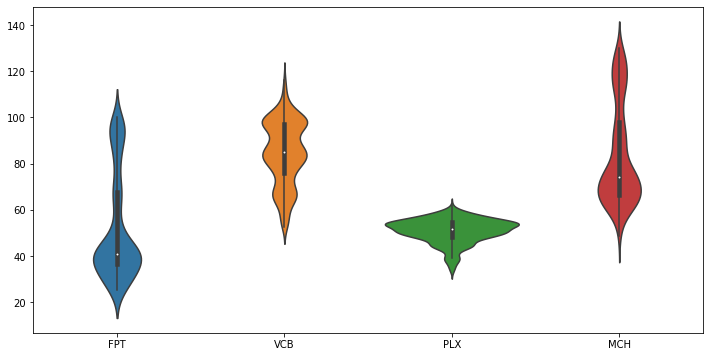

In [8]:
#Distribution of shares
plt.figure(figsize=(12,6))
sns.violinplot(data=data)
plt.show()

In [9]:
#Calculate returns of shares
return_df = data.pct_change().dropna()
return_df

,FPT,VCB,PLX,MCH
2019-01-03,-0.009754,0.000000,-0.014675,0.004923
2019-01-04,0.007486,0.014801,0.024255,-0.004899
2019-01-07,0.016817,0.003740,0.005401,0.000000
2019-01-08,0.005000,0.007265,-0.019835,0.009979
2019-01-09,0.009568,0.014611,0.001686,-0.008958
...,...,...,...,...
2021-12-14,-0.003125,-0.003012,0.014898,-0.000884
2021-12-15,0.002090,0.006042,0.001835,0.013274
2021-12-16,-0.004171,-0.008008,0.005495,-0.013100
2021-12-17,0.009424,-0.026236,-0.010929,0.002655


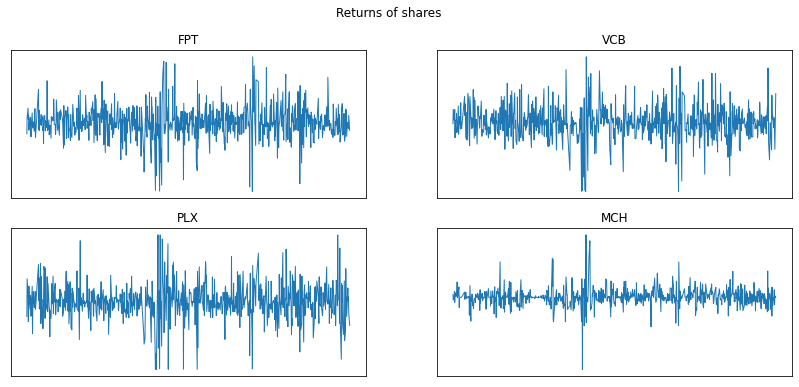

In [10]:
#Visual returns of shares
plt.figure(figsize=(14,6))
plt.suptitle('Returns of shares')
for i, col in enumerate(cols):
    ax = plt.subplot(2, 2, i+1)
    ax.plot(return_df.index.values, return_df[col], linewidth=1)
    ax.set_title(col)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

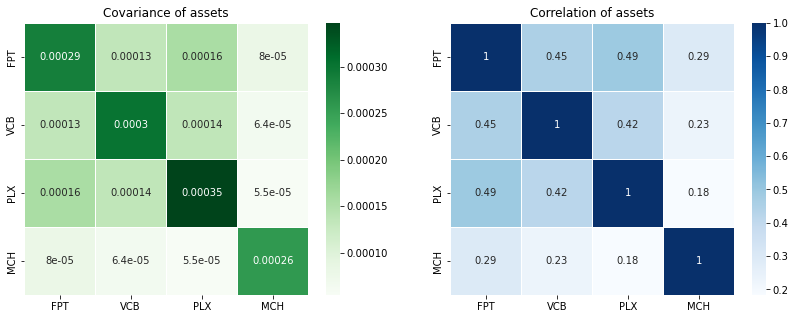

In [11]:
#Covariance and Correlation matrix
cov_matrix = return_df.cov()
corr_matrix = return_df.corr()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.set_title('Covariance of assets')
ax2.set_title('Correlation of assets')
sns.heatmap(cov_matrix, annot=True, cmap="Greens", linewidths=.5, ax=ax1)
ax2 = sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=.5, ax=ax2)
plt.show()

# Practical Implementation

## *Case 1 & 2: Portfolio optimazation with the lowest level of risk & the optimum combination of risk and returns*

To optimize we will use Sequential Least-Squares Programming (SLSQP) — SLSQP minimizes a function of several variables with any combination of bounds, equality and inequality constraints.

In [12]:
# Set params for calculate
mean_returns = return_df.mean()
num_portfolios = 100000
risk_free_rate = 0.125  # Assume

*Optimizing Portfolios based on Efficient Frontier*

> The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
> 
> Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return. 
>
> The efficient frontier is curved because there is a diminishing marginal return to risk. Each unit of risk added to a portfolio results in a relatively smaller amount of additional returns.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.48
Annualised Volatility: 0.27


              FPT  VCB  PLX  MCH
allocation  100.0  0.0  0.0  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.19


              FPT    VCB    PLX   MCH
allocation  18.42  22.93  17.95  40.7


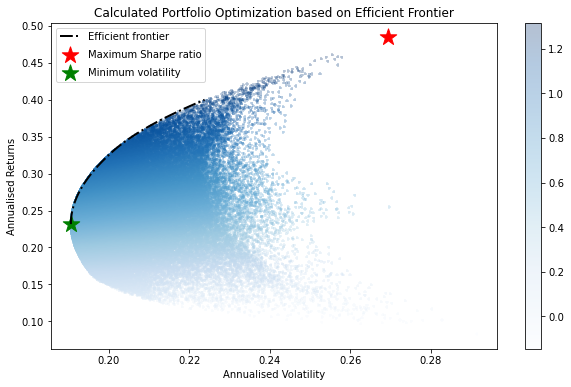

In [13]:
# Calculating Portfolios based on Efficient Frontier
ffp.display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, data)

In case 1, the green star represents the portfolio which is the least volatile. 

In the orther worlds, case 2, the red star is the optimum portfolio where the Sharpe ratio is the maximum.

## Case 3: A portfolio giving a return not less than the minimum acceptable return fixed.

Here we will use Roy’ Safety First (SF) criterion to determine the optimal portfolio weights.

> Roy’s safety-first criterion is a risk management technique used by investors to compare and choose a portfolio based on the criterion that the probability of a portfolio’s return dropping below a threshold level return is reduced.
> 
> In Roy’s safety-first criterion, the optimal portfolio is one that minimizes the probability of the portfolio’s return falling below a threshold return level. So, the portfolio with the highest SF ratio is the optimum portfolio.

In [14]:
# Set params for calculate
mean_returns = return_df.mean()
num_portfolios = 100000
risk_free_rate = 0.15  # Assume

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.48
Annualised Volatility: 0.27


              FPT  VCB  PLX  MCH
allocation  100.0  0.0  0.0  0.0


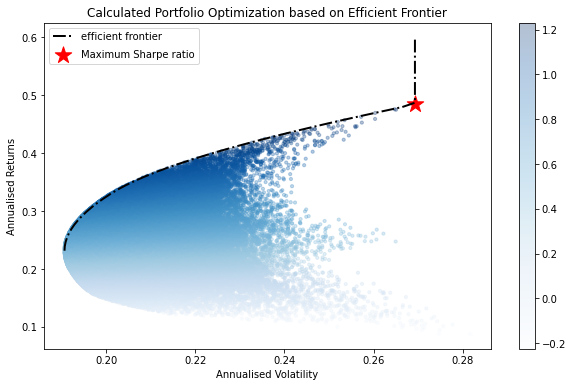

In [15]:
# Calculating Portfolios based on Efficient Frontier
ffp.display_calculated_ef_with_random_sfr(mean_returns, cov_matrix, num_portfolios, risk_free_rate, data)

## Case 4: A portfolio that maximizes the Investor’s utility

> One of the approaches to finding the optimal point on the efficient frontier for a given investor is to maximize the investor's utility. In the field of economics, utility (u) is a measure of how much benefit consumers derive from certain goods or services. From a finance standpoint, it refers to how much benefit investors obtain from portfolio performance. 
> 
> Utility is a measure of relative satisfaction that an investor derives from different portfolios. We can generate a mathematical function to represent this utility that is a function of the portfolio expected return, the portfolio variance and a measure of risk aversion.

$$U = E(r) - \frac{1}{2}A\sigma^2$$

Where $U$ = utility, $E(r)$ = portfolio expected return, $A$ = risk aversion coefficient and $\sigma^2$ = portfolio variance

The risk aversion coefficient, $A$, ranges between 0 and 10. Practically it ranges between 1 to 10. It is 1 for the aggressive investor(s), 4 for the moderate investor(s), and 10 for the risk-averse investor(s).

We will find the optimal portfolios for the three types of Investor(s) we mentioned above.



- *Aggressive Investor*

In [16]:
# Aggressive Investor
ffp.utility_optimal_portfolio(data=data, risk_aversion_coeff=1, risk_free_rate=0.125)

Expected annual return: 32.4%
Annual volatility: 20.1%
Sharpe Ratio: 1.51


("Allocation {'FPT': 0.4, 'VCB': 0.25, 'PLX': 0.14, 'MCH': 0.21}",
 'Annualised Reutrn 0.32',
 'Annualised Volatility 0.2',
 'Sharpe Ratio 1.51')

- *Moderate Investor*

In [17]:
# Moderate Investor
ffp.utility_optimal_portfolio(data=data, risk_aversion_coeff=4, risk_free_rate=0.125)

Expected annual return: 31.8%
Annual volatility: 20.0%
Sharpe Ratio: 1.49


("Allocation {'FPT': 0.39, 'VCB': 0.24, 'PLX': 0.14, 'MCH': 0.22}",
 'Annualised Reutrn 0.32',
 'Annualised Volatility 0.2',
 'Sharpe Ratio 1.49')

- *Risk-Averse Investor* 

In [18]:
# Risk-Averse Investor
ffp.utility_optimal_portfolio(data=data, risk_aversion_coeff=4, risk_free_rate=0.125)

Expected annual return: 31.8%
Annual volatility: 20.0%
Sharpe Ratio: 1.49


("Allocation {'FPT': 0.39, 'VCB': 0.24, 'PLX': 0.14, 'MCH': 0.22}",
 'Annualised Reutrn 0.32',
 'Annualised Volatility 0.2',
 'Sharpe Ratio 1.49')

## Conclusion

Critics contend MPT doesn’t deal with the real world, because all the measures used by MPT are based on projected values or mathematical statements about what is expected rather than real or existing. Investors have to use predictions based on historical measurements of asset returns and volatility in the equations, which means they are subject to be changed by variables currently not known or considered at the time of the equation.

Investors such as Warren Buffett remind us that portfolio theory is just that — theory. At the end of the day, a portfolio’s success rests on the investor’s skills and the time he or she devotes to it. Sometimes it is better to pick a small number of out-of-favour investments and wait for the market to turn in your favour than to rely on market averages alone.

*This is not to be taken as financial advice. I am not a qualified professional, so this notebook is only meant to be used for educational/entertainment purposes. Investing/trading can lead to losses.*

## References

1. [Investopedia](https://www.investopedia.com)
2. [Analystprep](https://www.analystprep.com)
3. [Corporatefinanceinstitute](https://www.corporatefinanceinstitute.com)
4. [Thestreet](https://www.thestreet.com)
5. [Unsplash](https://www.unsplash.com)
6. [Medium](https://amangupta16.medium.com)